HomeWork8.part 1

Author: Masomeh Aliheydarloo


## Loading the data and other imports:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
digits = load_digits(return_X_y =True)
X=digits[0]
y=digits[1]

In [ ]:
X.shape   #we have 64 features

(1797, 64)

In [ ]:
y.shape

(1797,)

In [ ]:
y

array([0, 1, 2, ..., 8, 9, 8])

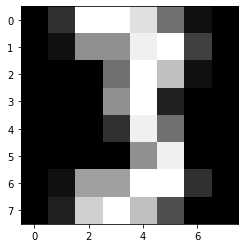

In [ ]:
plt.imshow(X[63,:].reshape(8,8),cmap='gray') 

## Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 1)a,b:Crossvalidate the hyperparameters 𝑐, γ, degree of polynomial 𝑑 and three kernels (linear, rbf and poly) and find the best setting.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([("scaler", StandardScaler()), ("svm", SVC())])

In [ ]:
#Create hyperparameters space
param_grid = [{
'svm__kernel': ['linear','rbf','poly'],
'svm__C': np.arange(0.01,11,1),
'svm__gamma': np.arange(0.001,0.01,0.001),
'svm__degree': [1, 2, 3, 4]}]

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
grid_svm = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=10)
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svm',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0...

### Finding the best hyperparameters:

In [ ]:
print("Best parameters: {}".format(grid_svm.best_params_))

Best parameters: {'svm__C': 9.01, 'svm__degree': 2, 'svm__gamma': 0.009000000000000001, 'svm__kernel': 'poly'}


### Evaluating cross validation accuracy:

In [ ]:
print("Best cross-validation accuracy: {:.2f}".format(grid_svm.best_score_))
print("Test set score: {:.2f}".format(grid_svm.score(X_test, y_test)))

Best cross-validation accuracy: 0.99
Test set score: 0.97


In [ ]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_svm.cv_results_)
# show the first 5 rows
display(results.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187
mean_fit_time,0.0561727,0.399772,0.257054,0.0562116,0.400213,0.255828,0.0555783,0.398617,0.256307,0.0548735,0.399603,0.254539,0.0540719,0.399742,0.257087,0.0550196,0.39936,0.256501,0.0541569,0.401666,0.256147,0.0546273,0.396375,0.255611,0.054423,0.397724,0.25507,0.0547411,0.398792,0.260272,0.0543241,0.401479,0.258726,0.0542976,0.39779,0.257739,0.0559357,0.398148,0.257601,0.054325,...,0.172408,0.0430879,0.0792204,0.146774,0.0420426,0.0805649,0.130216,0.042816,0.085942,0.119864,0.0422436,0.0893385,0.113726,0.043056,0.0752125,0.267449,0.0423818,0.0692878,0.26478,0.0421711,0.06961,0.26297,0.0425251,0.0708108,0.257469,0.0445818,0.0761323,0.24677,0.0428645,0.0787669,0.231788,0.0429285,0.0807437,0.209531,0.0435469,0.0843016,0.191777,0.0432267,0.0888876,0.173975
std_fit_time,0.00391615,0.00539902,0.00494142,0.00176063,0.00570735,0.00372602,0.00368213,0.00428692,0.00364716,0.00150614,0.00406109,0.00199945,0.000737963,0.00299188,0.00555913,0.00101874,0.00359405,0.00244109,0.00081513,0.00429542,0.00232847,0.00168365,0.00175702,0.00582142,0.000506612,0.00348137,0.00283169,0.00150697,0.00505429,0.00440346,0.00061166,0.00409886,0.00372372,0.00108787,0.00346518,0.00437418,0.00294302,0.00282003,0.00239218,0.000559813,...,0.00373771,0.00153907,0.00397879,0.00305745,0.00129259,0.00119528,0.00282494,0.00116201,0.00208363,0.00200204,0.00123311,0.00281421,0.00280451,0.00262318,0.00325998,0.00556553,0.00189108,0.00216836,0.00425543,0.000991059,0.00131641,0.00574804,0.00136546,0.00159929,0.00543478,0.00138332,0.00159238,0.00269927,0.00164673,0.00333935,0.00533578,0.00175702,0.0013145,0.0017147,0.00190313,0.00144775,0.00357391,0.00159846,0.00257371,0.00268943
mean_score_time,0.00866284,0.0250184,0.0165103,0.00885739,0.0243483,0.0166181,0.00852191,0.0248685,0.0165112,0.0087615,0.0251109,0.0169522,0.00857356,0.0244889,0.0167706,0.00895715,0.0247996,0.0165726,0.00849469,0.0246631,0.0166756,0.00867295,0.0243336,0.0165715,0.00867546,0.0243788,0.0165304,0.00853207,0.0245759,0.0168569,0.00862591,0.0253029,0.0170025,0.00878379,0.024502,0.0166778,0.00871549,0.0247219,0.0168501,0.00892305,...,0.0137543,0.00585229,0.0108791,0.0121794,0.00565326,0.0110287,0.0109821,0.00579171,0.0115068,0.0101076,0.00584342,0.0118832,0.00947771,0.00578444,0.0113198,0.0174916,0.00559125,0.0103624,0.0177339,0.00568821,0.0100914,0.0171547,0.00570183,0.0102723,0.0165608,0.00585687,0.011304,0.0162071,0.00579245,0.0110358,0.0156665,0.00570025,0.0113472,0.0149314,0.00571084,0.0112994,0.0140834,0.00570121,0.0116063,0.0128753
std_score_time,0.000148148,0.0012964,0.000166709,0.00028083,0.000240014,0.000196161,7.45171e-05,0.000731119,7.54143e-05,0.000325423,0.00146332,0.00147557,0.000241328,0.000381911,0.000915946,0.00103327,0.000782303,0.000203973,5.44726e-05,0.000227237,0.000375138,0.000215405,0.000225377,0.000336464,0.000350247,0.000238274,0.000178786,0.000121689,0.000437618,0.000294847,0.000152828,0.00243978,0.00039143,0.000780222,0.000397461,0.000198407,0.000761721,0.000913229,0.00032495,0.00110914,...,0.000481037,0.000383934,0.000375229,0.000443006,0.000156201,0.000195394,0.00025672,0.000307489,0.000531441,0.000391273,0.000448456,0.000300009,0.000340991,0.000324687,0.000171631,0.000573741,0.000117398,0.00027937,0.00123148,0.000237161,0.000284934,0.000775867,0.000175936,0.000265103,0.000167707,0.000329816,0.00112342,0.000297827,0.000317805,0.000476495,0.000488143,0.000244018,0.000288511,0.000478288,0.000159009,0.000198047,0.00089048,0.00023143,0.000221204,0.000598597
param_svm__C,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,

In [ ]:
grid_svm.cv_results_['params']

In [ ]:
grid_svm.cv_results_['mean_test_score']

array([0.9777195 , 0.1064831 , 0.1064831 , ..., 0.98050214, 0.98397436,
       0.80661908])

### Fitting the final model by the best parameters:

In [ ]:
grid_svm.best_estimator_.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm',
                 SVC(C=9.01, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=2,
                     gamma=0.009000000000000001, kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

###Evaluating Model Performance:

In [ ]:
print("Test set score: {:.2f}".format(grid_svm.best_estimator_.score(X_test, y_test)))

Test set score: 0.97


In [ ]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:','\n',confusion_matrix(y_test,grid_svm.best_estimator_.predict(X_test)))

Confusion Matrix: 
 [[36  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  1  0  0  1  0]
 [ 0  1  0  0 27  0  0  0  0  0]
 [ 0  0  0  0  0 35  0  0  0  1]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  2  0  0  0  0 37  0  0]
 [ 0  0  0  0  0  0  0  0 35  0]
 [ 0  0  0  1  0  1  0  2  0 35]]


Text(91.68, 0.5, 'Predicted Label')

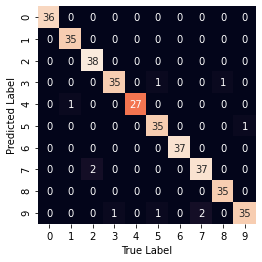

In [ ]:
import seaborn as sns

mat = confusion_matrix(y_test, grid_svm.best_estimator_.predict(X_test))
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=[0,1,2,3,4,5,6,7,8,9], yticklabels=[0,1,2,3,4,5,6,7,8,9])
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

## Compute the mean and standard deviation of the best SVM model accuracy for 1000 times:

In [ ]:
test_svm_acc = []

for i in range(1000):
    #split test and train data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #Fit model on training data
    grid_svm.best_estimator_.fit(X_train, y_train)
    
    # Evaluate model on test data
    acc = grid_svm.best_estimator_.score(X_test, y_test)
    test_svm_acc += [acc]

print("Mean Test Accuracy:{:.2f}".format(np.mean(test_svm_acc)))
print("standard deviation Test Accuracy:{:.2f}".format(np.std(test_svm_acc)))


Mean Test Accuracy:0.98
standard deviation Test Accuracy:0.01


# 1)c:The parameter ccp_alpha (max_depth) in decision tree. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [ ]:
#Create hyperparameters space
param_grid_Dtree=[{'max_depth': range(1,10),
                   'ccp_alpha':[0.0,0.01]}]

In [ ]:
#Scaled code
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipe = Pipeline([("scaler", StandardScaler()), ("tree", DecisionTreeClassifier())])
param_grid_Dtree=[{'tree__max_depth': range(1,10)}]

pipe.fit(X_train, y_train)
grid_t = GridSearchCV(estimator=pipe, param_grid=param_grid_Dtree, cv=10)
grid_t.fit(X_train, y_train)
print("Best parameters: {}".format(grid_t.best_params_))
print("Best cross-validation accuracy: {:.2f}".format(grid_t.best_score_))
print("Test set score: {:.2f}".format(grid_t.score(X_test, y_test)))

Best parameters: {'tree__max_depth': 9}
Best cross-validation accuracy: 0.84
Test set score: 0.84


In [ ]:
# Create grid search
grid_Dtree = GridSearchCV(estimator=tree, param_grid=param_grid_Dtree, scoring='accuracy',cv=10)
grid_Dtree.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'ccp_alpha': [0.0, 0.01], 'max_depth': range(1, 10)

### Finding the best hyperparameters:

In [ ]:
print("Best parameters: {}".format(grid_Dtree.best_params_))

Best parameters: {'ccp_alpha': 0.0, 'max_depth': 9}


### Evaluating cross validation accuracy:

In [ ]:
print("Best cross-validation accuracy: {:.2f}".format(grid_Dtree.best_score_))
print("Test set score: {:.2f}".format(grid_Dtree.score(X_test, y_test)))

Best cross-validation accuracy: 0.84
Test set score: 0.86


### Fitting the best parameter:

In [ ]:
grid_Dtree.best_estimator_.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Evaluating Model Performance:

In [ ]:
print("Test set score: {:.2f}".format(grid_Dtree.best_estimator_.score(X_test, y_test)))

Test set score: 0.84


In [ ]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:','\n',confusion_matrix(y_test,grid_Dtree.best_estimator_.predict(X_test)))

Confusion Matrix: 
 [[30  0  0  0  0  0  1  0  0  0]
 [ 0 31  0  1  2  0  0  0  3  1]
 [ 1  0 33  0  0  1  0  0  0  1]
 [ 0  0  1 21  0  0  0  1  1  3]
 [ 1  1  0  1 31  1  0  2  0  0]
 [ 0  0  0  2  1 32  2  0  0  1]
 [ 1  0  0  0  1  1 32  0  0  0]
 [ 0  0  3  1  3  0  0 33  1  1]
 [ 0  1  2  3  0  0  0  0 27  1]
 [ 0  1  2  1  3  0  0  1  0 34]]


## Compute the mean and standard deviation of the best Decision Tree model accuracy for 1000 times:

In [ ]:
test_dt_acc = []

for i in range(1000):
    #split test and train data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    #Fit model on training data
    grid_Dtree.best_estimator_.fit(X_train, y_train)
    
    # Evaluate model on test data
    acc = grid_Dtree.best_estimator_.score(X_test, y_test)
    test_dt_acc += [acc]

print("Mean Test Accuracy:{:.2f}".format(np.mean(test_dt_acc)))
print("standard deviation Test Accuracy:{:.2f}".format(np.std(test_dt_acc)))


Mean Test Accuracy:0.85
standard deviation Test Accuracy:0.02


# 1)d:Number of estimators for bagging. You can use the best tree obtained from part c as your base estimator.

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag=BaggingClassifier(base_estimator=tree)

In [ ]:
#Create hyperparameters space
param_grid_bag=[{'n_estimators': [10, 20, 30, 40, 50, 60, 70,80, 90, 100]}]

In [ ]:
# Create grid search
grid_bag = GridSearchCV(estimator=bag, param_grid=param_grid_bag, scoring='accuracy',cv=10)
grid_bag.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=None,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                        

### Finding the best hyperparameters:

In [ ]:
print("Best parameters: {}".format(grid_bag.best_params_))

Best parameters: {'n_estimators': 70}


### Evaluating cross validation accuracy:

In [ ]:
print("Best cross-validation accuracy: {:.2f}".format(grid_bag.best_score_))
print("Test set score: {:.2f}".format(grid_bag.score(X_test, y_test)))

Best cross-validation accuracy: 0.95
Test set score: 0.96


### Fitting the best parameter:

In [ ]:
grid_bag.best_estimator_.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


### Evaluating Model Performance:

In [ ]:
print("Test set score: {:.2f}".format(grid_bag.best_estimator_.score(X_test, y_test)))

Test set score: 0.96


In [ ]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:','\n',confusion_matrix(y_test,grid_bag.best_estimator_.predict(X_test)))

Confusion Matrix: 
 [[34  0  0  0  0  0  0  0  1  0]
 [ 0 36  0  0  0  0  0  0  1  0]
 [ 0  0 36  0  0  0  0  1  0  0]
 [ 0  0  0 38  0  1  0  0  0  2]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  1  1 32  0  0  0  0]
 [ 0  1  0  0  1  0 32  0  1  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  1  1  0  0  0  0  0 26  0]
 [ 0  0  0  0  0  0  0  1  1 37]]


### Compute the mean and standard deviation of the best Bagging model accuracy for 1000 times:

In [ ]:
test_bag_acc = []
count=0

for i in range(1000):
    count=count+1
    #split test and train data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    #Fit model on training data
    grid_bag.best_estimator_.fit(X_train, y_train)

    # Evaluate model on test data
    acc = grid_bag.best_estimator_.score(X_test, y_test)
    test_bag_acc += [acc]

print("Mean Test Accuracy:{:.2f}".format(np.mean(test_bag_acc)))
print("standard deviation Test Accuracy:{:.2f}".format(np.std(test_bag_acc)))


Mean Test Accuracy:0.95
standard deviation Test Accuracy:0.01


## 1)e: Number of estimators (M in slides) for boosting. You can use the best tree obtained from part c as your base estimator.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
boost = AdaBoostClassifier(base_estimator=tree)

In [ ]:
#Create hyperparameters space
param_grid_boost=[{'n_estimators': [10, 20, 30, 40, 50, 60, 70,80, 90, 100]}]

In [ ]:
# Create grid search
grid_boost = GridSearchCV(estimator=boost, param_grid=param_grid_boost, scoring='accuracy',cv=10)
grid_boost.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,


### Find the best hyperparameters:

In [ ]:
print("Best parameters: {}".format(grid_boost.best_params_))

Best parameters: {'n_estimators': 10}


### Evaluating cross validation accuracy

In [ ]:
print("Best cross-validation accuracy: {:.2f}".format(grid_boost.best_score_))
print("Test set score: {:.2f}".format(grid_boost.score(X_test, y_test)))

Best cross-validation accuracy: 0.86
Test set score: 0.81


### Fitting the best parameter:

In [ ]:
grid_boost.best_estimator_.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

### Evaluating Model Performance:

In [ ]:
print("Test set score: {:.2f}".format(grid_boost.best_estimator_.score(X_test, y_test)))

Test set score: 0.86


In [ ]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:','\n',confusion_matrix(y_test,grid_boost.best_estimator_.predict(X_test)))

Confusion Matrix: 
 [[28  0  0  0  0  2  0  0  0  0]
 [ 0 33  0  0  1  0  0  1  3  1]
 [ 0  0 40  0  0  0  0  1  3  1]
 [ 0  1  0 32  1  0  1  1  1  2]
 [ 0  0  0  0 35  1  1  1  1  0]
 [ 0  0  1  1  0 25  0  0  0  0]
 [ 2  0  0  0  0  0 29  1  0  0]
 [ 0  0  0  0  0  0  0 30  1  0]
 [ 2  1  1  1  0  2  0  1 27  4]
 [ 1  2  2  1  0  0  0  2  1 30]]


## Compute the mean and standard deviation of the best Boosting model accuracy for 1000 times:

In [ ]:
test_ada_acc = []

for i in range(1000):
    #split test and train data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #Fit model on training data
    grid_boost.best_estimator_.fit(X_train, y_train)
    
    # Evaluate model on test data
    acc = grid_boost.best_estimator_.score(X_test, y_test)
    test_ada_acc += [acc]

print("Mean Test Accuracy:{:.2f}".format(np.mean(test_ada_acc)))
print("standard deviation Test Accuracy:{:.2f}".format(np.std(test_ada_acc)))


Mean Test Accuracy:0.85
standard deviation Test Accuracy:0.02


# 1)f: Number of estimators and max_depth and n_estimators in random forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomf = RandomForestClassifier()

In [ ]:
#Create hyperparameters space
param_grid_forest=[{'n_estimators': [10, 20, 30, 40, 50, 60, 70,80, 90, 100],
                   'max_depth': range(1,10)}]

In [ ]:
# Create grid search
grid_forest = GridSearchCV(estimator=randomf, param_grid=param_grid_forest, scoring='accuracy',cv=10)
grid_forest.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

### Finding the best hyperparameters:

In [ ]:
print("Best parameters: {}".format(grid_forest.best_params_))

Best parameters: {'max_depth': 9, 'n_estimators': 70}


### Evaluating cross validation accuracy

In [ ]:
print("Best cross-validation accuracy: {:.2f}".format(grid_forest.best_score_))
print("Test set score: {:.2f}".format(grid_forest.score(X_test, y_test)))

Best cross-validation accuracy: 0.98
Test set score: 0.96


### Fitting the best parameter:

In [ ]:
grid_forest.best_estimator_.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Evaluating Model Performance:

In [ ]:
print("Test set score: {:.2f}".format(grid_forest.best_estimator_.score(X_test, y_test)))

Test set score: 0.97


In [ ]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:','\n',confusion_matrix(y_test,grid_forest.best_estimator_.predict(X_test)))

Confusion Matrix: 
 [[36  0  0  0  0  0  0  0  1  0]
 [ 0 37  0  0  0  1  0  0  0  0]
 [ 1  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  1  0]
 [ 0  0  0  0 30  0  0  1  0  0]
 [ 0  0  0  0  0 38  0  0  1  1]
 [ 0  0  0  0  0  0 41  0  1  0]
 [ 0  0  0  0  0  0  0 36  0  1]
 [ 0  1  0  0  0  0  0  0 29  1]
 [ 0  0  0  0  0  0  0  0  1 29]]


## Compute the mean and standard deviation of the best Random Forest model accuracy for 1000 times:

In [ ]:
test_randf_acc = []


for i in range(1000):
    #split test and train data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #Fit model on training data
    grid_forest.best_estimator_.fit(X_train, y_train)

    # Evaluate model on test data
    acc = grid_forest.best_estimator_.score(X_test, y_test)
    test_randf_acc += [acc]

print("Mean Test Accuracy:{:.2f}".format(np.mean(test_randf_acc)))
print("standard deviation Test Accuracy:{:.2f}".format(np.std(test_randf_acc)))


Mean Test Accuracy:0.97
standard deviation Test Accuracy:0.01
